In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series, DataFrame, Panel

%matplotlib inline

path = "D://"
water_filename = path + "water_quality.csv"
flood_filename = path + "flood.csv"

water_data = pd.read_csv(water_filename)
flood_data = pd.read_csv(flood_filename)

Here, we convert time format from timestamp to date (YYYY-mm-dd)

GB109053027371
http://environment.data.gov.uk/catchment-planning/WaterBody/GB109053027371

Bristol Avon (By Bk to Netham Weir)

In [26]:
def convertDatetimeandFormat(data, column):
    data[column]=pd.to_datetime(data[column])
    data[column] = data[column].dt.strftime('%Y-%m-%d')
    return data

In [27]:
water_data = convertDatetimeandFormat(water_data, 'sample.sampleDateTime')


Here, we try to analyze the correlation between **water flow and BOD ATU** for a single water body (GB109053027371).

In [28]:
water_df = water_data[['determinand.label', 'sample.sampleDateTime','result', 
                      'determinand.unit.label','stationReference', 'Waterbody ID','water body']]

filtered_water_df = water_df.loc[(water_df['Waterbody ID'] == 'GB109053027371') & (water_df['determinand.label'] == 'BOD ATU')]


group by 'sample.sampleDateTime','Waterbody ID','determinand.label'

This command is able to get the mean number of pollution variables of each waterbody ID every day.

In [29]:
w_grouped = filtered_water_df.groupby(['sample.sampleDateTime'])['result'].mean()
w_grouped

sample.sampleDateTime
2016-07-12     9.0
2016-07-13    12.0
2016-07-29    18.0
2016-08-07     9.0
2016-08-08    12.0
2016-08-17     9.0
2016-09-07     9.0
2016-09-08    14.0
2016-09-26    15.0
2016-09-27    15.0
Name: result, dtype: float64

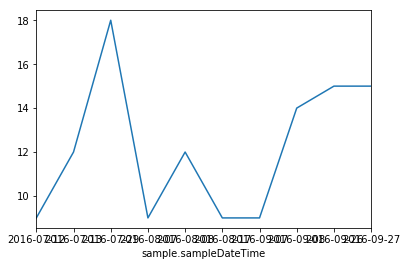

In [30]:
w_grouped.plot()

In [31]:
flood_df = flood_data[['date', 'value','Waterbody ID']]
filtered_flood_df = flood_df.loc[flood_df['date'].isin(w_grouped.index.get_level_values('sample.sampleDateTime').tolist())]

f_grouped = filtered_flood_df.groupby(['date'])['value'].mean()
f_grouped

date
2016-07-12    5.452769
2016-07-13    5.336615
2016-07-29    4.604308
2016-08-07    4.427692
2016-08-08    3.956757
2016-08-17    3.341231
2016-09-07    4.070000
2016-09-08    3.638923
2016-09-26    3.870462
2016-09-27    3.685231
Name: value, dtype: float64

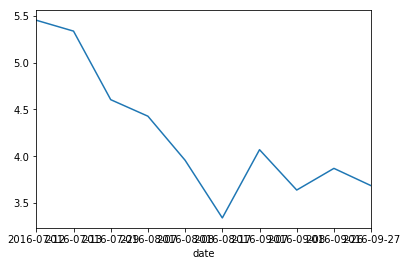

In [37]:
f_grouped.plot()

In [45]:
joint_df = DataFrame({'BOD ATU' : w_grouped, 'FLOW' : f_grouped})
joint_df

,BOD ATU,FLOW
2016-07-12,9.0,5.452769
2016-07-13,12.0,5.336615
2016-07-29,18.0,4.604308
2016-08-07,9.0,4.427692
2016-08-08,12.0,3.956757
2016-08-17,9.0,3.341231
2016-09-07,9.0,4.070000
2016-09-08,14.0,3.638923
2016-09-26,15.0,3.870462
2016-09-27,15.0,3.685231


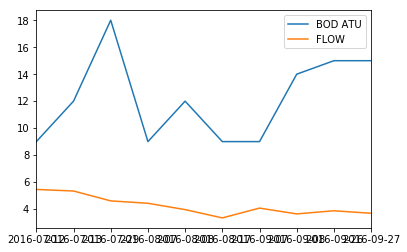

In [46]:
joint_df.plot()

In [48]:
joint_df.corr(method='pearson')

,BOD ATU,FLOW
BOD ATU,1.00000,-0.13456
FLOW,-0.13456,1.00000
